# 주제

## 코스피 데이터와 경제지표를 이용한 데이터 시각화

## import

In [1]:
import pandas as pd

## kospi

In [49]:
kospi_data = pd.read_csv('data/kospi_data.csv')
kospi_data.rename(columns={'Close':'Price'}, inplace=True)
kospi_data = kospi_data[['Date', 'Price', 'Open', 'High', 'Low']]
kospi_data

,Date,Price,Open,High,Low
0,1981-05-01,123.60,123.60,123.60,123.60
1,1981-05-02,123.50,123.50,123.50,123.50
2,1981-05-04,120.60,120.60,120.60,120.60
3,1981-05-06,120.70,120.70,120.70,120.70
4,1981-05-07,119.30,119.30,119.30,119.30
...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48


# 세계 주요 지수의 등락율 비교 (2000-2022, 월별)

## 세계 주요 지수 목록

- KOSPI Composite Index(Korea)
- S&P 500(US)
- Dow Jones Industrial Average(US)
- NASDAQ Composite(US)
- FTSE 100(UK)
- DAX PERFORMANCE-INDEX(Germany)
- Nikkei 225(Japan)
- EURO STOXX 50
- BSE sensex(India)

## 데이터최적화

### sp500_data

In [3]:
sp500_data = pd.read_csv('data/sp500_data.csv')
sp500_data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/31/2023,"4,076.60","4,020.85","4,077.16","4,020.44",NaN,1.46%
1,01/30/2023,"4,017.77","4,049.27","4,063.85","4,015.55",NaN,-1.30%
2,01/27/2023,"4,070.56","4,053.72","4,094.21","4,048.70",NaN,0.25%
3,01/26/2023,"4,060.43","4,036.08","4,061.57","4,013.29",NaN,1.10%
4,01/25/2023,"4,016.22","3,982.71","4,019.55","3,949.06",NaN,-0.02%
...,...,...,...,...,...,...,...
2533,01/08/2013,"1,457.15","1,461.89","1,461.89","1,451.64",NaN,-0.32%
2534,01/07/2013,"1,461.89","1,466.47","1,466.47","1,456.62",NaN,-0.31%
2535,01/04/2013,"1,466.47","1,459.37","1,467.94","1,458.99",NaN,0.49%
2536,01/03/2013,"1,459.37","1,462.42","1,465.47","1,455.53",NaN,-0.21%


In [47]:
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"]).dt.strftime('%Y-%m-%d')
sp500_data.sort_values(by='Date', ascending=True, inplace=True)
sp500_data.reset_index(drop=True, inplace=True)
sp500_data = sp500_data[['Date', 'Price', 'Open', 'High', 'Low']]
sp500_data

,Date,Price,Open,High,Low
0,2013-01-02,"1,462.42","1,426.19","1,462.43","1,426.19"
1,2013-01-03,"1,459.37","1,462.42","1,465.47","1,455.53"
2,2013-01-04,"1,466.47","1,459.37","1,467.94","1,458.99"
3,2013-01-07,"1,461.89","1,466.47","1,466.47","1,456.62"
4,2013-01-08,"1,457.15","1,461.89","1,461.89","1,451.64"
...,...,...,...,...,...
2533,2023-01-25,"4,016.22","3,982.71","4,019.55","3,949.06"
2534,2023-01-26,"4,060.43","4,036.08","4,061.57","4,013.29"
2535,2023-01-27,"4,070.56","4,053.72","4,094.21","4,048.70"
2536,2023-01-30,"4,017.77","4,049.27","4,063.85","4,015.55"


### dowjones_data

In [5]:
dowjones_data = pd.read_csv('data/dowjones_data.csv')
dowjones_data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/31/2023,"34,086.89","33,803.56","34,095.23","33,665.78",330.30M,1.10%
1,01/30/2023,"33,717.68","33,855.66","34,054.40","33,695.24",334.51M,-0.76%
2,01/27/2023,"33,977.55","33,952.93","34,163.12","33,832.00",432.42M,0.09%
3,01/26/2023,"33,948.29","33,872.43","33,951.95","33,635.60",313.25M,0.61%
4,01/25/2023,"33,743.71","33,538.36","33,773.09","33,273.21",336.09M,0.03%
...,...,...,...,...,...,...,...
2533,01/08/2013,"13,328.85","13,377.42","13,377.42","13,293.13",129.57M,-0.41%
2534,01/07/2013,"13,384.29","13,436.13","13,436.13","13,343.32",113.12M,-0.38%
2535,01/04/2013,"13,435.21","13,391.05","13,447.11","13,376.23",107.59M,0.33%
2536,01/03/2013,"13,391.36","13,413.01","13,430.60","13,358.30",129.63M,-0.16%


In [6]:
dowjones_data["Date"] = pd.to_datetime(dowjones_data["Date"]).dt.strftime('%Y-%m-%d')

In [7]:
dowjones_data.sort_values(by='Date', ascending=True, inplace=True)

In [50]:
dowjones_data.reset_index(drop=True, inplace=True)
dowjones_data = dowjones_data[['Date', 'Price', 'Open', 'High', 'Low']]
dowjones_data

,Date,Price,Open,High,Low
0,2013-01-02,"13,412.55","13,104.30","13,412.71","13,104.30"
1,2013-01-03,"13,391.36","13,413.01","13,430.60","13,358.30"
2,2013-01-04,"13,435.21","13,391.05","13,447.11","13,376.23"
3,2013-01-07,"13,384.29","13,436.13","13,436.13","13,343.32"
4,2013-01-08,"13,328.85","13,377.42","13,377.42","13,293.13"
...,...,...,...,...,...
2533,2023-01-25,"33,743.71","33,538.36","33,773.09","33,273.21"
2534,2023-01-26,"33,948.29","33,872.43","33,951.95","33,635.60"
2535,2023-01-27,"33,977.55","33,952.93","34,163.12","33,832.00"
2536,2023-01-30,"33,717.68","33,855.66","34,054.40","33,695.24"


### nasdaq_data

In [9]:
nasdaq_data = pd.read_csv('data/nasdaq_data.csv')
nasdaq_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [51]:
nasdaq_data["Date"] = pd.to_datetime(nasdaq_data["Date"]).dt.strftime('%Y-%m-%d')
nasdaq_data.sort_values(by='Date', ascending=True, inplace=True)
nasdaq_data.reset_index(drop=True, inplace=True)
nasdaq_data.rename(columns={'Close/Last':'Price'}, inplace=True)
nasdaq_data = nasdaq_data[['Date', 'Price', 'Open', 'High', 'Low']]
nasdaq_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


### ftse100_data

In [11]:
ftse100_data = pd.read_csv('data/ftse100_data.csv')
ftse100_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [52]:
ftse100_data["Date"] = pd.to_datetime(ftse100_data["Date"]).dt.strftime('%Y-%m-%d')
ftse100_data.sort_values(by='Date', ascending=True, inplace=True)
ftse100_data.reset_index(drop=True, inplace=True)
ftse100_data.rename(columns={'Close/Last':'Price'}, inplace=True)
ftse100_data = ftse100_data[['Date', 'Price', 'Open', 'High', 'Low']]
ftse100_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


### dax_data

In [13]:
dax_data = pd.read_csv('data/dax_data.csv')
dax_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [55]:
dax_data["Date"] = pd.to_datetime(dax_data["Date"]).dt.strftime('%Y-%m-%d')
dax_data.sort_values(by='Date', ascending=True, inplace=True)
dax_data.reset_index(drop=True, inplace=True)
dax_data.rename(columns={'Close/Last':'Price'}, inplace=True)
dax_data = dax_data[['Date', 'Price', 'Open', 'High', 'Low']]
dax_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


### nikkei225_data

In [56]:
nikkei225_data = pd.read_csv('data/nikkei225_data.csv')
nikkei225_data.rename(columns={'Close':'Price'}, inplace=True)
nikkei225_data = nikkei225_data[['Date', 'Price', 'Open', 'High', 'Low']]
nikkei225_data

,Date,Price,Open,High,Low
0,2013-01-04,10688.11,10604.50,10734.23,10602.24
1,2013-01-07,10599.01,10743.69,10743.69,10589.70
2,2013-01-08,10508.06,10544.21,10602.12,10463.43
3,2013-01-09,10578.57,10405.67,10620.70,10398.61
4,2013-01-10,10652.64,10635.11,10686.12,10619.65
...,...,...,...,...,...
2457,2023-01-25,27395.01,27175.88,27473.90,27175.88
2458,2023-01-26,27362.75,27444.64,27502.15,27284.08
2459,2023-01-27,27382.56,27428.41,27452.67,27326.91
2460,2023-01-30,27433.40,27384.77,27486.42,27337.25


### eurostoxx50_data

In [57]:
eurostoxx50_data = pd.read_csv('data/eurostoxx50_data.csv')
eurostoxx50_data.rename(columns={'Close':'Price'}, inplace=True)
eurostoxx50_data = eurostoxx50_data[['Date', 'Price', 'Open', 'High', 'Low']]
eurostoxx50_data

,Date,Price,Open,High,Low
0,2013-01-03,2701.219971,2705.800049,2705.800049,2689.300049
1,2013-01-04,2709.350098,2696.939941,2711.020020,2690.110107
2,2013-01-07,2695.560059,2712.250000,2714.179932,2691.040039
3,2013-01-08,2691.449951,2690.909912,2710.199951,2684.899902
4,2013-01-09,2706.389893,2697.510010,2710.489990,2691.000000
...,...,...,...,...,...
2528,2023-01-25,4148.109863,4153.629883,4158.770020,4116.990234
2529,2023-01-26,4173.979980,4156.509766,4183.560059,4156.509766
2530,2023-01-27,4178.009766,4177.259766,4188.709961,4154.529785
2531,2023-01-30,4158.629883,4166.750000,4166.750000,4122.209961


### bsesensex_data

In [58]:
bsesensex_data = pd.read_csv('data/bsesensex_data.csv')
bsesensex_data.sort_values(by='Date', ascending=True, inplace=True)
bsesensex_data.reset_index(drop=True, inplace=True)
bsesensex_data.rename(columns={'Close':'Price'}, inplace=True)
bsesensex_data = bsesensex_data[['Date', 'Price', 'Open', 'High', 'Low']]
bsesensex_data

,Date,Price,Open,High,Low
0,2013-01-01,19580.81,19513.45,19623.76,19508.93
1,2013-01-02,19714.24,19693.30,19756.68,19686.50
2,2013-01-03,19764.78,19771.03,19786.30,19693.29
3,2013-01-04,19784.08,19782.59,19797.44,19679.99
4,2013-01-07,19691.42,19820.56,19856.43,19654.46
...,...,...,...,...,...
2492,2023-01-24,60978.75,61122.20,61266.06,60849.12
2493,2023-01-25,60205.06,60834.73,60899.21,60081.36
2494,2023-01-27,59330.90,60166.90,60166.90,58974.70
2495,2023-01-30,59500.41,59101.69,59644.24,58699.20


## 데이터셋 조회

In [59]:
sp500_data

,Date,Price,Open,High,Low
0,2013-01-02,"1,462.42","1,426.19","1,462.43","1,426.19"
1,2013-01-03,"1,459.37","1,462.42","1,465.47","1,455.53"
2,2013-01-04,"1,466.47","1,459.37","1,467.94","1,458.99"
3,2013-01-07,"1,461.89","1,466.47","1,466.47","1,456.62"
4,2013-01-08,"1,457.15","1,461.89","1,461.89","1,451.64"
...,...,...,...,...,...
2533,2023-01-25,"4,016.22","3,982.71","4,019.55","3,949.06"
2534,2023-01-26,"4,060.43","4,036.08","4,061.57","4,013.29"
2535,2023-01-27,"4,070.56","4,053.72","4,094.21","4,048.70"
2536,2023-01-30,"4,017.77","4,049.27","4,063.85","4,015.55"


In [60]:
dowjones_data

,Date,Price,Open,High,Low
0,2013-01-02,"13,412.55","13,104.30","13,412.71","13,104.30"
1,2013-01-03,"13,391.36","13,413.01","13,430.60","13,358.30"
2,2013-01-04,"13,435.21","13,391.05","13,447.11","13,376.23"
3,2013-01-07,"13,384.29","13,436.13","13,436.13","13,343.32"
4,2013-01-08,"13,328.85","13,377.42","13,377.42","13,293.13"
...,...,...,...,...,...
2533,2023-01-25,"33,743.71","33,538.36","33,773.09","33,273.21"
2534,2023-01-26,"33,948.29","33,872.43","33,951.95","33,635.60"
2535,2023-01-27,"33,977.55","33,952.93","34,163.12","33,832.00"
2536,2023-01-30,"33,717.68","33,855.66","34,054.40","33,695.24"


In [61]:
nasdaq_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


In [62]:
ftse100_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


In [63]:
dax_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2536,2023-01-24,11334.27,11302.93,11378.15,11282.65
2537,2023-01-25,11313.36,11146.53,11334.22,11069.18
2538,2023-01-26,11512.41,11458.40,11516.05,11341.19
2539,2023-01-27,11621.71,11470.47,11691.89,11470.27


In [64]:
nikkei225_data

,Date,Price,Open,High,Low
0,2013-01-04,10688.11,10604.50,10734.23,10602.24
1,2013-01-07,10599.01,10743.69,10743.69,10589.70
2,2013-01-08,10508.06,10544.21,10602.12,10463.43
3,2013-01-09,10578.57,10405.67,10620.70,10398.61
4,2013-01-10,10652.64,10635.11,10686.12,10619.65
...,...,...,...,...,...
2457,2023-01-25,27395.01,27175.88,27473.90,27175.88
2458,2023-01-26,27362.75,27444.64,27502.15,27284.08
2459,2023-01-27,27382.56,27428.41,27452.67,27326.91
2460,2023-01-30,27433.40,27384.77,27486.42,27337.25


In [65]:
eurostoxx50_data

,Date,Price,Open,High,Low
0,2013-01-03,2701.219971,2705.800049,2705.800049,2689.300049
1,2013-01-04,2709.350098,2696.939941,2711.020020,2690.110107
2,2013-01-07,2695.560059,2712.250000,2714.179932,2691.040039
3,2013-01-08,2691.449951,2690.909912,2710.199951,2684.899902
4,2013-01-09,2706.389893,2697.510010,2710.489990,2691.000000
...,...,...,...,...,...
2528,2023-01-25,4148.109863,4153.629883,4158.770020,4116.990234
2529,2023-01-26,4173.979980,4156.509766,4183.560059,4156.509766
2530,2023-01-27,4178.009766,4177.259766,4188.709961,4154.529785
2531,2023-01-30,4158.629883,4166.750000,4166.750000,4122.209961


In [66]:
bsesensex_data

,Date,Price,Open,High,Low
0,2013-01-01,19580.81,19513.45,19623.76,19508.93
1,2013-01-02,19714.24,19693.30,19756.68,19686.50
2,2013-01-03,19764.78,19771.03,19786.30,19693.29
3,2013-01-04,19784.08,19782.59,19797.44,19679.99
4,2013-01-07,19691.42,19820.56,19856.43,19654.46
...,...,...,...,...,...
2492,2023-01-24,60978.75,61122.20,61266.06,60849.12
2493,2023-01-25,60205.06,60834.73,60899.21,60081.36
2494,2023-01-27,59330.90,60166.90,60166.90,58974.70
2495,2023-01-30,59500.41,59101.69,59644.24,58699.20


## 데이터 시각화

In [85]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

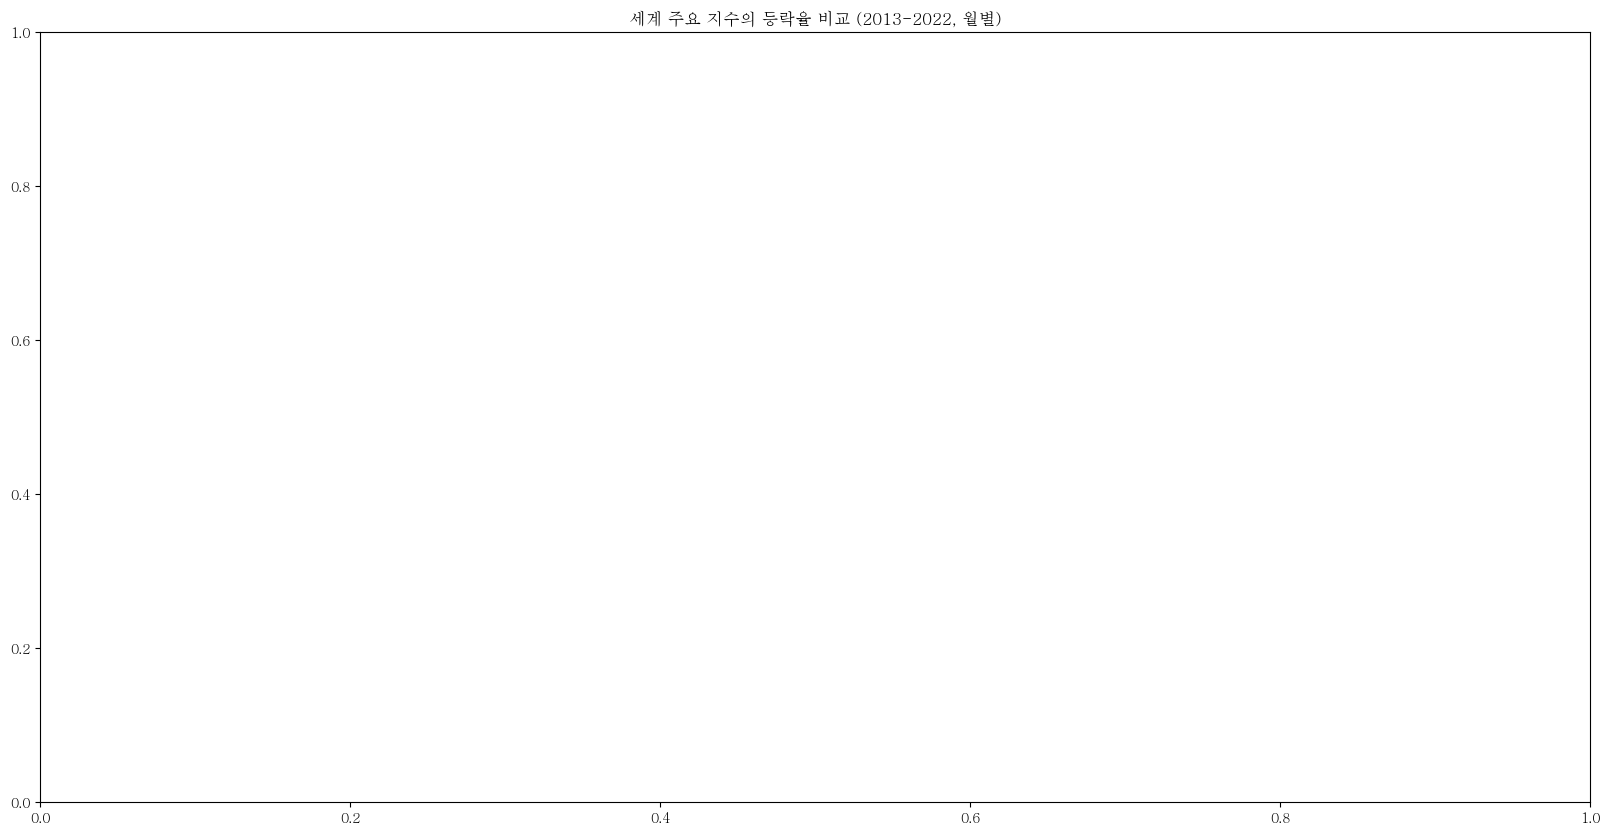

In [89]:
mpl.rcParams['font.family'] = 'Batang'

plt.figure(figsize = (20,10))
plt.title('세계 주요 지수의 등락율 비교 (2013-2022, 월별)')
plt.show()